# Data Loading

In [1]:
import pandas as pd
import numpy as np
import random
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


# Set seeds
np.random.seed(42)
random.seed(42)

In [2]:
df = pd.read_excel('/kaggle/input/male-fertility/DIB dataset and codebook.xlsx')

In [3]:
df.head()

,ID,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,...,JS33,JS34,JS35,JS36,JP1,JP2,JP3,JP4,JP5,JP6
0,1,2,1,1,1,1,1,6,1,4,...,5,4,4,4,4,4,4,2,5,5
1,2,2,1,1,1,2,1,6,1,3,...,5,3,5,5,5,5,4,5,5,5
2,3,2,1,1,1,2,1,6,1,5,...,5,5,5,5,5,5,5,5,5,5
3,4,3,1,1,2,1,2,5,1,5,...,4,5,5,5,2,2,2,4,5,5
4,5,2,1,1,1,1,1,6,1,3,...,5,5,5,5,5,5,5,5,5,5


In [4]:
# Calculate the mean of OS1 to OS35 and assign it to the new column OS
df['JS'] = df.loc[:, 'JS1':'JS36'].sum(axis=1)

def min_max_normalize(column):
    min_val = column.min()
    max_val = column.max()
    normalized_column = (column - min_val) / (max_val - min_val)
    return normalized_column

df['JS_norm'] = min_max_normalize(df['JS'])

#Creating Labels of target column JS

rating = []
for row in df['JS_norm']:
    if row <= 0.5:
        rating.append(0)
    else:
        rating.append(1)
df['Target'] = rating

In [5]:
df.drop(columns=['JS1', 'JS2', 'JS3', 'JS4', 'JS5', 'JS6', 'JS7', 'JS8', 'JS9', 'JS10', 'JS11', 'JS12', 'JS13', 'JS14', 'JS15', 'JS16', 'JS17', 'JS18', 'JS19', 'JS20', 'JS21', 'JS22', 'JS23', 'JS24', 'JS25', 'JS26', 'JS27', 'JS28', 'JS29', 'JS30', 'JS31', 'JS32', 'JS33', 'JS34', 'JS35', 'JS36'], inplace=True)
df = df.drop(columns=['ID', 'JS_norm', 'JS'])
df = df.drop(columns=['JP1', 'JP2', 'JP3', 'JP4', 'JP5', 'JP6'])

In [6]:
df.head()

,Age,Religion,Ethnicity,Marital status,Marriage period,No. of children,Educational level,Employment status,Working period,Household income,...,OS33,OS34,OS35,OS36,OS37,OS38,OS39,OS40,OS41,Target
0,2,1,1,1,1,1,6,1,4,7,...,5,5,5,4,4,4,4,4,4,1
1,2,1,1,1,2,1,6,1,3,4,...,4,5,5,3,2,3,2,3,3,0
2,2,1,1,1,2,1,6,1,5,7,...,4,5,5,3,4,4,3,4,4,1
3,3,1,1,2,1,2,5,1,5,10,...,2,5,4,3,4,4,3,3,3,1
4,2,1,1,1,1,1,6,1,3,5,...,5,5,5,4,4,4,4,4,4,1


In [7]:
df['Target'].value_counts()

Target
1    180
0    129
Name: count, dtype: int64

# Data Splitting

In [8]:
X = df.drop(['Target'], axis=1)  # Features
y = df['Target']  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42) 

**Data Normalization**

In [9]:
# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler on the training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrame for easier handling
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Feature Selection

**Zero-Variance Feature Elimination**

In [10]:
from sklearn.feature_selection import VarianceThreshold

# Initialize VarianceThreshold with threshold=0 to remove zero-variance features
zero_var_selector = VarianceThreshold(threshold=0)
X_train_reduced = zero_var_selector.fit_transform(X_train)

# Retain only the features that are not zero-variance
retained_features = X_train.columns[zero_var_selector.get_support()]
X_train_reduced = pd.DataFrame(X_train_reduced, columns=retained_features)

# Apply the same transformation to X_test
X_test_reduced = X_test[retained_features]

print("Features retained after Zero-Variance Elimination: ", retained_features)

# Number of features selected
print("\nNumber of features selected: ", len(retained_features))

Features retained after Zero-Variance Elimination:  Index(['Age', 'Religion', 'Ethnicity', 'Marital status', 'Marriage period',
       'No. of children', 'Educational level', 'Employment status',
       'Working period', 'Household income', 'Sperm quality', 'OS1', 'OS2',
       'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8', 'OS9', 'OS10', 'OS11', 'OS12',
       'OS13', 'OS14', 'OS15', 'OS16', 'OS17', 'OS18', 'OS19', 'OS20', 'OS21',
       'OS22', 'OS23', 'OS24', 'OS25', 'OS26', 'OS27', 'OS28', 'OS29', 'OS30',
       'OS31', 'OS32', 'OS33', 'OS34', 'OS35', 'OS36', 'OS37', 'OS38', 'OS39',
       'OS40', 'OS41'],
      dtype='object')

Number of features selected:  52


**Pearson’s Correlation Analysis**

In [11]:
# Calculate Pearson correlation matrix
corr_matrix = X_train_reduced.corr().abs()

# Create a mask to exclude the diagonal elements
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Set the correlation threshold (e.g., 0.8)
threshold = 0.8

# Find columns with correlation above the threshold
to_drop = []
for column in corr_matrix.columns:
    # Get the correlation values for the current column, excluding the diagonal
    correlated_features = corr_matrix[column][mask[:, corr_matrix.columns.get_loc(column)]]
    
    # If any of the correlations exceed the threshold, add the column to the drop list
    if any(correlated_features > threshold):
        to_drop.append(column)

# Drop the highly correlated features
X_train_final = X_train_reduced.drop(columns=to_drop)
X_test_final = X_test_reduced.drop(columns=to_drop)

print("Dropped Features due to high correlation: ", to_drop)
print("Features retained after Pearson's Correlation Analysis: ", X_train_final.columns)

# Number of features selected
print("\nNumber of features selected: ", len(X_train_final.columns))

Dropped Features due to high correlation:  ['Ethnicity']
Features retained after Pearson's Correlation Analysis:  Index(['Age', 'Religion', 'Marital status', 'Marriage period',
       'No. of children', 'Educational level', 'Employment status',
       'Working period', 'Household income', 'Sperm quality', 'OS1', 'OS2',
       'OS3', 'OS4', 'OS5', 'OS6', 'OS7', 'OS8', 'OS9', 'OS10', 'OS11', 'OS12',
       'OS13', 'OS14', 'OS15', 'OS16', 'OS17', 'OS18', 'OS19', 'OS20', 'OS21',
       'OS22', 'OS23', 'OS24', 'OS25', 'OS26', 'OS27', 'OS28', 'OS29', 'OS30',
       'OS31', 'OS32', 'OS33', 'OS34', 'OS35', 'OS36', 'OS37', 'OS38', 'OS39',
       'OS40', 'OS41'],
      dtype='object')

Number of features selected:  51


**RFCV**

              Feature  Importance
20               OS15    0.074959
24               OS19    0.066142
22               OS17    0.042419
13                OS8    0.040487
21               OS16    0.033713
23               OS18    0.033712
4    Household income    0.031959
28               OS23    0.027387
36               OS33    0.027187
25               OS20    0.026708
33               OS30    0.025311
41               OS38    0.024852
10                OS5    0.024594
34               OS31    0.024465
32               OS29    0.022635
11                OS6    0.021248
19               OS14    0.021195
38               OS35    0.021060
17               OS12    0.020856
35               OS32    0.020101
39               OS36    0.020086
14                OS9    0.019857
40               OS37    0.019594
6                 OS1    0.019558
5       Sperm quality    0.019542
26               OS21    0.018648
42               OS39    0.018583
31               OS28    0.018082
12            

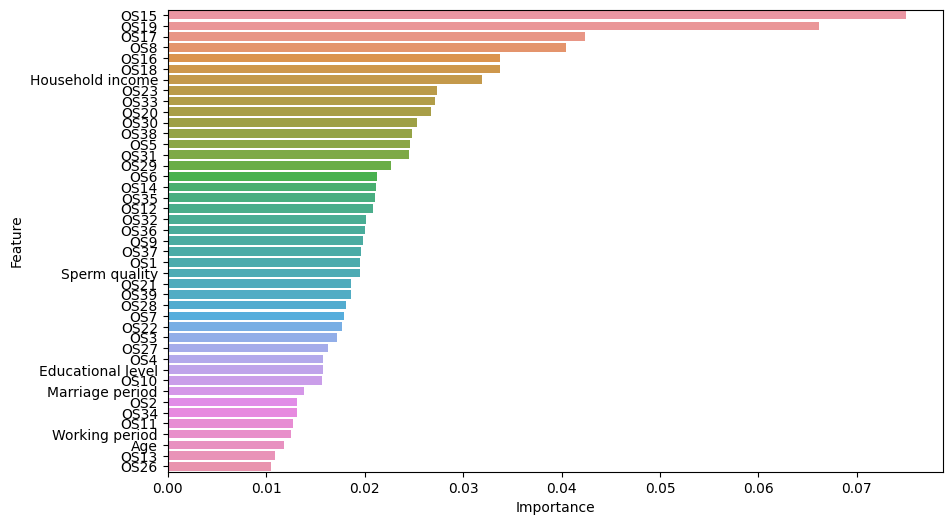

In [13]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model = RandomForestClassifier(random_state=42)

# Initialize RFECV
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='accuracy')

# Fit RFECV
rfecv.fit(X_train_final, y_train)

# Selected features after RFECV
X_train_selected = X_train_final.loc[:, rfecv.support_]
X_test_selected = X_test_final.loc[:, rfecv.support_]  # Assuming you have X_test for validation

# Retrain the model using the selected features
model.fit(X_train_selected, y_train)

# Get feature importances
importances = model.feature_importances_

# Create a DataFrame for better visualization
importances_df = pd.DataFrame({
    'Feature': X_train_selected.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importances_df)


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importances_df)
plt.savefig('rfecv_features.png', format='png', bbox_inches='tight')
plt.show()



In [13]:
# Extract the top 28 feature names as a list
top_20_features_list = importances_df.head(20)['Feature'].tolist()

print(top_20_features_list)

['OS15', 'OS19', 'OS17', 'OS8', 'OS16', 'OS18', 'Household income', 'OS23', 'OS33', 'OS20', 'OS30', 'OS38', 'OS5', 'OS31', 'OS29', 'OS6', 'OS14', 'OS35', 'OS12', 'OS32']


In [14]:
model_selected = ['OS19', 'OS15', 'Household income', 'OS8', 'OS18', 'OS17', 'OS21', 'OS33', 
                  'OS12', 'OS29', 'OS16', 'OS37', 'OS11', 'OS1', 'OS31', 'OS7', 'OS27', 'OS5', 
                  'OS30', 'OS23']

rfcv_selected = ['OS15', 'OS19', 'OS17', 'OS8', 'OS16', 'OS18', 'Household income', 'OS23', 'OS33', 'OS20', 'OS30', 'OS38', 'OS5', 'OS31', 'OS29', 'OS6', 'OS14', 'OS35', 'OS12', 'OS32']

combined_unique_list = list(set(model_selected + rfcv_selected))

print(combined_unique_list)

# Number of features selected
print("\nNumber of features selected: ", len(combined_unique_list))

['OS23', 'OS17', 'OS11', 'OS7', 'OS37', 'OS21', 'OS31', 'OS12', 'OS16', 'OS15', 'OS5', 'OS32', 'OS18', 'Household income', 'OS30', 'OS35', 'OS38', 'OS1', 'OS29', 'OS6', 'OS20', 'OS8', 'OS27', 'OS19', 'OS33', 'OS14']

Number of features selected:  26


In [15]:

# Combine and deduplicate feature names
selected_features = ['OS23', 'OS17', 'OS11', 'OS7', 'OS37', 'OS21', 'OS31', 'OS12', 'OS16', 
                     'OS15', 'OS5', 'OS32', 'OS18', 'Household income', 'OS30', 'OS35', 'OS38',
                     'OS1', 'OS29', 'OS6', 'OS20', 'OS8', 'OS27', 'OS19', 'OS33', 'OS14']


# Filter X_train and X_test to keep only these features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

print(f"Shape of X_train after selection: {X_train_selected.shape}")
print(f"Shape of X_test after selection: {X_test_selected.shape}")


Shape of X_train after selection: (247, 26)
Shape of X_test after selection: (62, 26)


In [16]:
X_train = X_train_selected
X_test = X_test_selected

# Model Selection

In [17]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

# Hyperparameter Optimization - Randomized Search CV

In [18]:
# Define model hyperparameter spaces
param_distributions = {
    'DecisionTreeClassifier': {
        'max_depth': [None, 10, 20, 30, 40, 50],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'RandomForestClassifier': {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'AdaBoostClassifier': {
        'n_estimators': [50, 100, 150],
        'learning_rate': [0.01, 0.1, 1.0]
    },
    'LGBMClassifier': {
        'num_leaves': [31, 62, 127],
        'learning_rate': [0.01, 0.1, 0.5],
        'n_estimators': [100, 200, 300]
    },
    'XGBClassifier': {
        'n_estimators': [100, 200, 300],
        'learning_rate': [0.01, 0.1, 0.5],
        'max_depth': [3, 6, 9]
    },
    
    'LogisticRegression': {
        'C': np.logspace(-4, 4, 20),
        'solver': ['liblinear', 'lbfgs', 'saga'],
        'max_iter': [100, 200, 500, 1000], 
    },
    'SVC': {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    'KNeighborsClassifier': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
}

# Instantiate models
models = {
    'DecisionTreeClassifier': DecisionTreeClassifier(),
    'RandomForestClassifier': RandomForestClassifier(),
    'AdaBoostClassifier': AdaBoostClassifier(),
    'LGBMClassifier': LGBMClassifier(verbose=-1),
    'XGBClassifier': XGBClassifier(),
    'LogisticRegression': LogisticRegression(),
    'SVC': SVC(),
    'KNeighborsClassifier': KNeighborsClassifier()
}

best_params = {}

for model_name, model in models.items():
    print(f"Running RandomizedSearchCV for {model_name}")
    clf = RandomizedSearchCV(model, param_distributions[model_name], n_iter=10, cv=5, verbose=1, random_state=42, n_jobs=-1)
    clf.fit(X_train, y_train)
    best_params[model_name] = clf.best_params_
    print(f"Best parameters for {model_name}: {clf.best_params_}")

Running RandomizedSearchCV for DecisionTreeClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for DecisionTreeClassifier: {'min_samples_split': 10, 'min_samples_leaf': 4, 'max_depth': 10}
Running RandomizedSearchCV for RandomForestClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for RandomForestClassifier: {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_depth': 20}
Running RandomizedSearchCV for AdaBoostClassifier
Fitting 5 folds for each of 9 candidates, totalling 45 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 9 is smaller than n_iter=10. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for AdaBoostClassifier: {'n_estimators': 150, 'learning_rate': 0.1}
Running RandomizedSearchCV for LGBMClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for LGBMClassifier: {'num_leaves': 127, 'n_estimators': 300, 'learning_rate': 0.01}
Running RandomizedSearchCV for XGBClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best parameters for XGBClassifier: {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1}
Running RandomizedSearchCV for LogisticRegression
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Best parameters for LogisticRegression: {'solver': 'lbfgs', 'max_iter': 100, 'C': 0.615848211066026}
Running RandomizedSearchCV for SVC
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters for SVC: {'kernel': 'linear', 'C': 1}
Running RandomizedSearchCV for KNeighborsClassifier
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for KNeighborsClassifier: {'weights': 'uniform', 'n_neighbors': 9, 'metric': 'manhattan'}


# Model Training and Evaluation

Classification Report for DecisionTreeClassifier:
               precision    recall  f1-score   support

           0     0.7200    0.6923    0.7059        26
           1     0.7838    0.8056    0.7945        36

    accuracy                         0.7581        62
   macro avg     0.7519    0.7489    0.7502        62
weighted avg     0.7570    0.7581    0.7573        62

ROC-AUC Score for DecisionTreeClassifier: 0.7073
__________________________

Classification Report for RandomForestClassifier:
               precision    recall  f1-score   support

           0     0.8571    0.6923    0.7660        26
           1     0.8049    0.9167    0.8571        36

    accuracy                         0.8226        62
   macro avg     0.8310    0.8045    0.8116        62
weighted avg     0.8268    0.8226    0.8189        62

ROC-AUC Score for RandomForestClassifier: 0.9017
__________________________

Classification Report for AdaBoostClassifier:
               precision    recall  f1-score

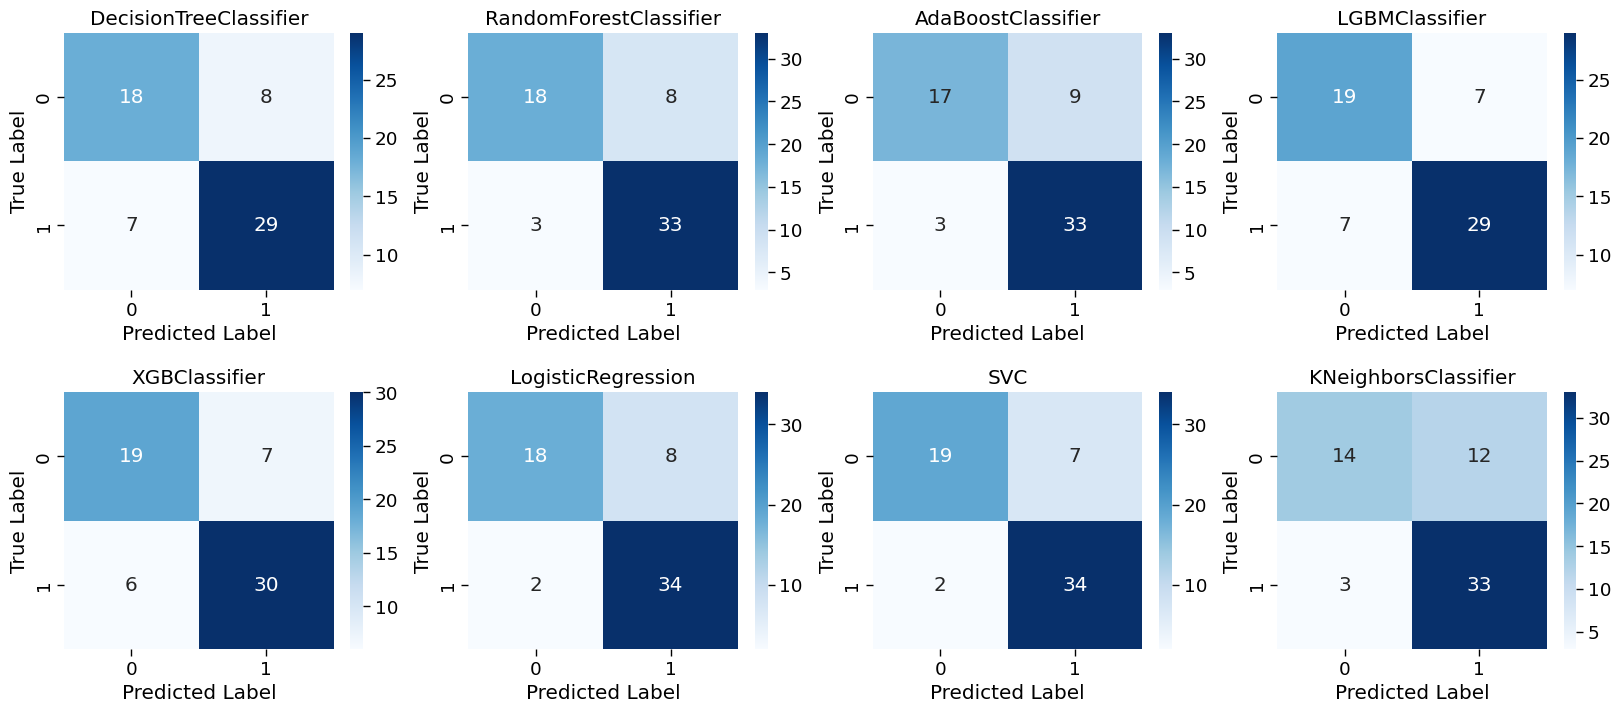

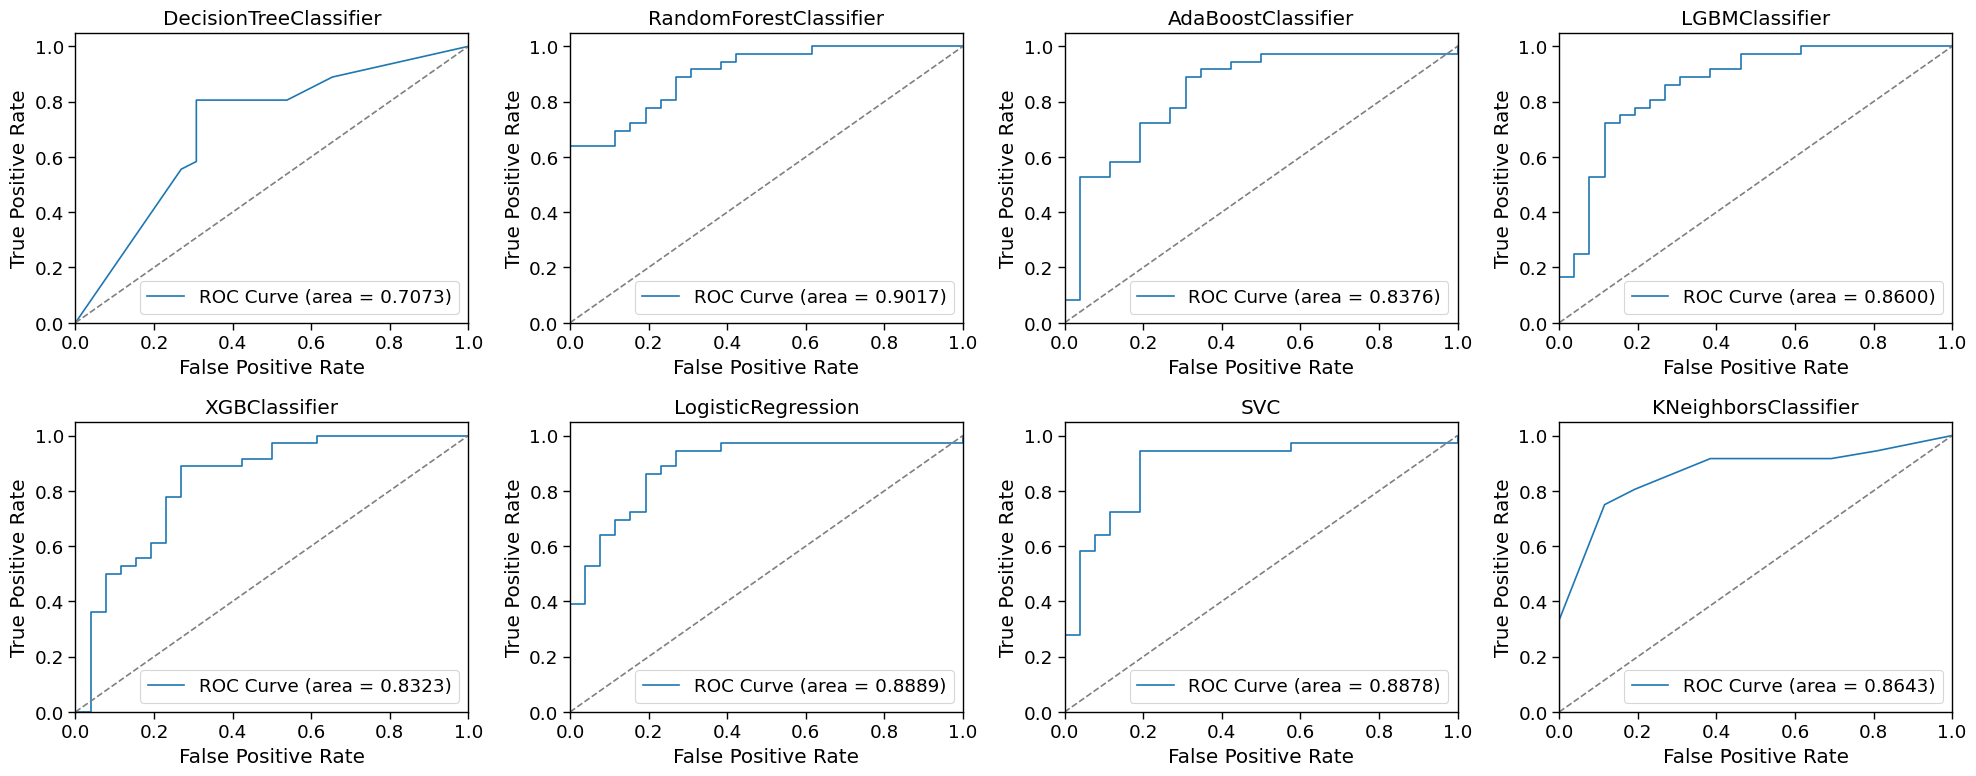

In [20]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adjust plot settings for better readability
sns.set_context("paper", font_scale=1.5)

# Create subplots for confusion matrices and ROC curves
fig_conf_matrix, axes_conf_matrix = plt.subplots(2, 4, figsize=(20, 8))  # 4 per row, 2 rows
plt.subplots_adjust(hspace=0.4)  # Adjust the height space between rows
fig_roc_curve, axes_roc_curve = plt.subplots(2, 4, figsize=(20, 8))  # 4 per row, 2 rows

# Flatten the axes for easier iteration
axes_conf_matrix = axes_conf_matrix.flatten()
axes_roc_curve = axes_roc_curve.flatten()

for idx, (model_name, model) in enumerate(models.items()):
    # Initialize the model with the best parameters
    optimized_model = model.set_params(**best_params[model_name])

    # Train the model
    optimized_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = optimized_model.predict(X_test)


    # For models that support predict_proba, use it to calculate ROC-AUC
    if hasattr(optimized_model, "predict_proba"):
        y_proba = optimized_model.predict_proba(X_test)[:, 1]
    elif hasattr(optimized_model, "decision_function"):
        y_proba = optimized_model.decision_function(X_test)
    else:
        y_proba = y_pred  # If neither method is available, fall back to predictions
    y_pred_binary = y_pred

    # Confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred_binary)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=True, ax=axes_conf_matrix[idx])
    axes_conf_matrix[idx].set_title(f'{model_name}')
    axes_conf_matrix[idx].set_xlabel('Predicted Label')
    axes_conf_matrix[idx].set_ylabel('True Label')

    # Classification report
    class_report = classification_report(y_test, y_pred_binary, digits = 4)
    print(f"Classification Report for {model_name}:\n", class_report)
    
    # Calculate and print the ROC-AUC score
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC-AUC Score for {model_name}: {roc_auc:.4f}")
    print("__________________________\n")

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    axes_roc_curve[idx].plot(fpr, tpr, label=f'ROC Curve (area = {roc_auc:.4f})')
    axes_roc_curve[idx].plot([0, 1], [0, 1], color='gray', linestyle='--')
    axes_roc_curve[idx].set_xlim([0.0, 1.0])
    axes_roc_curve[idx].set_ylim([0.0, 1.05])
    axes_roc_curve[idx].set_xlabel('False Positive Rate')
    axes_roc_curve[idx].set_ylabel('True Positive Rate')
    axes_roc_curve[idx].set_title(f'{model_name}')
    axes_roc_curve[idx].legend(loc='lower right')

# Adjust layout and save the confusion matrix figure as a PDF
plt.tight_layout()
fig_conf_matrix.savefig('confusion_matrices.pdf', format='pdf')
fig_conf_matrix.savefig('confusion_matrices.png', format='png')

# Adjust layout and save the ROC curve figure as a PDF
plt.tight_layout()
fig_roc_curve.savefig('roc_curves.pdf', format='pdf')
fig_roc_curve.savefig('roc_curves.png', format='png')

# Display the figures
plt.show()
